<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 6.5MB 8.1MB/s 
     |████████████████████████████████| 15.3MB 286kB/s 


In [3]:
!brew install graphviz

/bin/bash: brew: command not found


In [4]:
import geopandas as gpd
import pandas as pd
import numpy  as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
import graphviz
import pylab as pl
pl.rcParams["font.size"] = 18
pl.rcParams["figure.figsize"] = (10,10)
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [5]:
nychouses = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/allzips.csv")

In [6]:
nychouses.head()

,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url
0,263 9th Ave APT 6B,New York,NY,10001,2599988,1536.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
1,15 Hudson Yards # 67E,New York,NY,10001,7575000,2497.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
2,15 Hudson Yards # PH86D,New York,NY,10001,8475000,2515.0,3.0,4.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
3,540 W 28th St PH A,New York,NY,10001,3550000,1755.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
4,15 Hudson Yards # 34G,New York,NY,10001,4420000,1460.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...


In [7]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true


--2021-04-20 14:34:14--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip [following]
--2021-04-20 14:34:14--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip [following]
--2021-04-20 14:34:15--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [8]:
nychouses = nychouses[["zip", "price", "sqft", "bedrooms", "bathrooms"]]

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [11]:
zips = gpd.read_file("ZIP_CODE_040114.zip")


In [12]:
zips

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


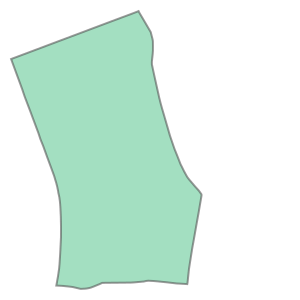

In [13]:
zips.loc[0,"geometry"]

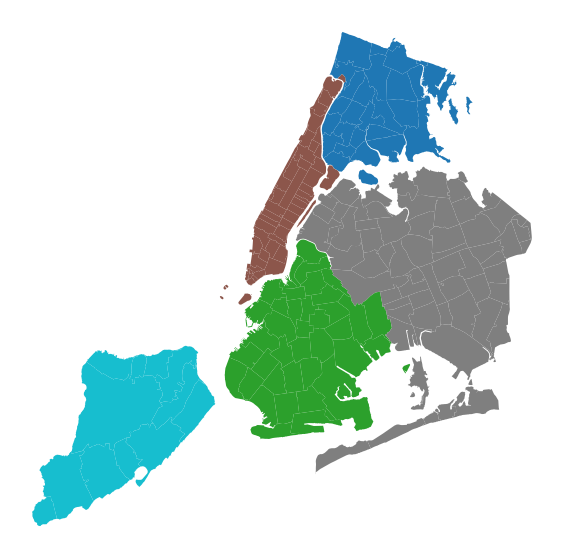

In [14]:
ax = zips.plot(column="COUNTY", figsize=(10,10))
ax.axis('off');


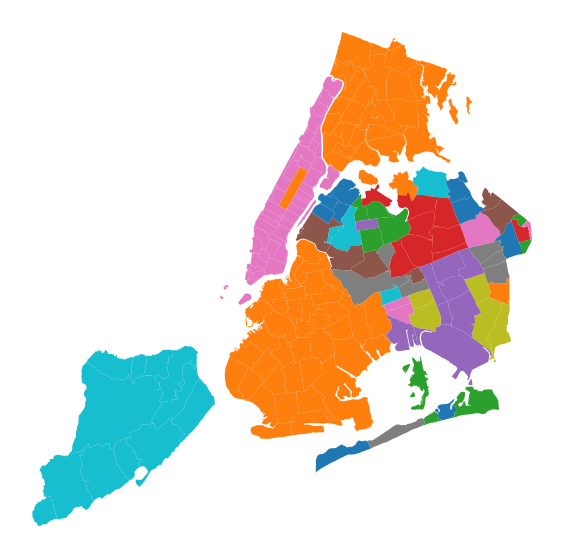

In [22]:
ax = zips.plot(column="PO_NAME", figsize=(10,10))
ax.axis('off');

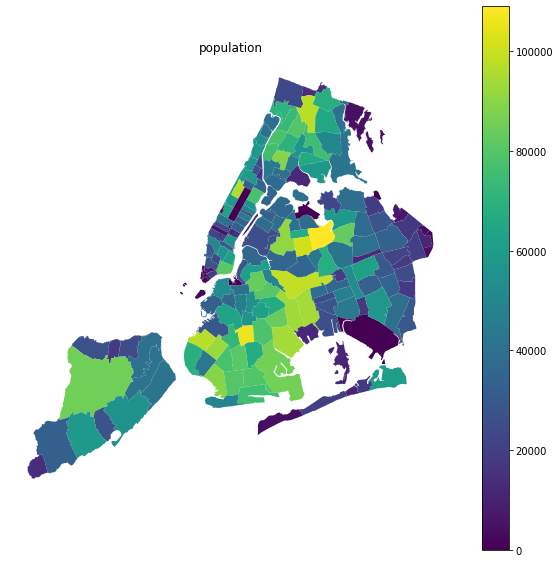

In [21]:
ax = zips.plot(column="POPULATION", figsize=(10,10), legend=True)
ax.set_title("population")
ax.axis('off');

In [15]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true


--2021-04-20 14:34:43--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-04-20 14:34:43--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-04-20 14:34:43--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [16]:
!wget https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson


--2021-04-20 14:34:43--  https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson
Resolving opendata.arcgis.com (opendata.arcgis.com)... 3.227.94.184, 54.172.36.210, 54.82.249.95, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|3.227.94.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson.1’

e68ceb0a193e4e378b2     [           <=>      ] 206.47M  46.3MB/s    in 4.5s    

2021-04-20 14:34:48 (46.1 MB/s) - ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson.1’ saved [216502798]



In [17]:
italy = gpd.GeoDataFrame.from_file("e68ceb0a193e4e378b29255b62ab75e0_0.geojson")


In [18]:
!unzip 'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'


Archive:  CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
replace CEDIT_6_5_Friuli_Italy_1976.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
italy.to_crs(epsg=4326)


,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,1,1,1,201,201,1042,001042,Burolo,,0,13222.896787,{428A5371-1203-4014-9D3B-D6F2353A226F},0.141254,5.475974e+06,"MULTIPOLYGON (((7.93812 45.49086, 7.93818 45.4..."
1,2,1,1,1,201,201,1060,001060,Casalborgone,,0,24056.822202,{7772511B-1529-4A71-8ED1-7880DC64354A},0.270078,2.012501e+07,"MULTIPOLYGON (((7.91362 45.15298, 7.91369 45.1..."
2,3,1,1,1,201,201,1076,001076,Chianocco,,0,21411.076163,{0F2EE4C5-219C-43DD-AD6E-D8AE5E9F5F7B},0.225795,1.861335e+07,"MULTIPOLYGON (((7.18303 45.19351, 7.18342 45.1..."
3,4,1,1,1,201,201,1077,001077,Chiaverano,,0,18164.369945,{16E8325A-C7CD-4B85-AB7D-74216B9D06B3},0.196687,1.202212e+07,"MULTIPOLYGON (((7.90330 45.52628, 7.90360 45.5..."
4,5,1,1,1,201,201,1079,001079,Chiesanuova,,0,10777.398475,{8FF28D8A-C5F5-4214-AFA0-999D470CF9C8},0.116011,4.118911e+06,"MULTIPOLYGON (((7.65285 45.42981, 7.65407 45.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921,7922,5,20,90,0,90,90055,090055,Pattada,,0,68982.842121,{899F5A3D-A8EA-4F00-B074-2043ECD71C5D},0.714765,1.648777e+08,"MULTIPOLYGON (((9.06375 40.67057, 9.06431 40.6..."
7922,7923,5,20,111,0,111,111009,111009,Carbonia,,1,67399.354027,{A5D0EB0D-12E5-4713-8959-60CA7F1C23AA},0.698552,1.455415e+08,"MULTIPOLYGON (((8.55251 39.27980, 8.55310 39.2..."
7923,7924,5,20,91,0,91,91039,091039,Loceri,,0,36459.248203,{87048657-CFAF-4D2D-9D07-910B41B00860},0.383662,1.937352e+07,"MULTIPOLYGON (((9.59146 39.87038, 9.59162 39.8..."
7924,7925,5,20,95,0,95,95083,095083,Magomadas,,0,21155.248455,{A59554E8-69CB-4738-9BB1-8866B97B3B76},0.226034,9.019823e+06,"MULTIPOLYGON (((8.48814 40.27146, 8.48851 40.2..."


NameError: ignored

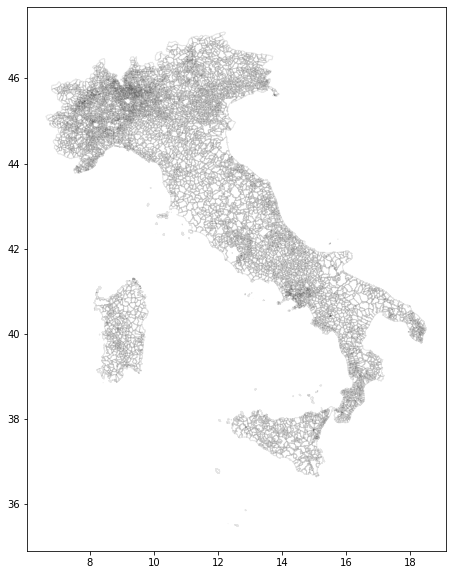

In [20]:
ax = italy.to_crs(epsg=4326).plot(facecolor="none", edgecolor="k", 
                                  figsize=(10,10), alpha=0.1)
eq.plot(color="r", ax=ax)


In [ ]:
nychouses["price"] = pd.to_numeric(nychouses.price, errors="coerce")
nychouses["price"].dtypes


In [ ]:
tmp_ = zips.merge(nychouses, right_on="zip", left_on="ZIPCODE").reset_index()
tmp_.merge(tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean().reset_index(
    ), on="ZIPCODE")
